In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath("")))
sys.path.insert(0,os.path.dirname(os.path.abspath("")))

import ecdf
import numpy as np
from rdkit import RDLogger
import sys
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)
import logging
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
logging.getLogger('matplotlib').setLevel(logging.WARNING)
import matplotlib.pyplot as plt
import os

In [8]:
basedir="/media/julian/ex1ext4_1/chem_graph_unit/input/CID_SMILES/mol"
files=os.listdir(basedir)
import random
len(files)

996309

In [9]:
files=[os.path.join(basedir,f) for f in files if f.endswith("mol")]
len(files)

996309

In [12]:
from molNet.utils.smiles.generator import generate_n_random_hetero_carbon_lattice
from molNet.featurizer.molecule_featurizer import MolWt_Featurizer
import cdf_h
import pickle

ecdres=1000
#smiles = np.array([k for k in generate_n_random_hetero_carbon_lattice(n=1000, max_c=10)])
#ecdf_d = ecdf.gen_ecdf_from_smiles(smiles,cdf_h.FixSVFeaturizerList)    
data_folder="ecdf_data"
os.makedirs(data_folder,exist_ok=True)
for F in cdf_h.classlist:
    print(F.__name__)
    file=os.path.join(data_folder,F.__name__+".pckl")
    if os.path.exists(file):
        continue
    random.shuffle(files)
    ecdf_d = ecdf.gen_ecdf_from_mol_file(files,
                                         F,# MolWt_Featurizer,
                                         min_run=1_00_000,
                                         )
    with open(file,"w+b") as f:
        pickle.dump(ecdf_d,f)

Asphericity_Featurizer
BCUT2D_CHGHI_Featurizer
BCUT2D_CHGLO_Featurizer
BCUT2D_LOGPHI_Featurizer
BCUT2D_LOGPLOW_Featurizer
BCUT2D_MRHI_Featurizer
BCUT2D_MRLOW_Featurizer
BCUT2D_MWHI_Featurizer
BCUT2D_MWLOW_Featurizer
BalabanJ_Featurizer
BertzCT_Featurizer
Chi0_Featurizer
Chi0n_Featurizer
Chi0v_Featurizer
Chi1_Featurizer
Chi1n_Featurizer
Chi1v_Featurizer
Chi2n_Featurizer
Chi2v_Featurizer
Chi3n_Featurizer
Chi3v_Featurizer
Chi4n_Featurizer
Chi4v_Featurizer
EState_VSA10_Featurizer
EState_VSA11_Featurizer
EState_VSA1_Featurizer
EState_VSA2_Featurizer
EState_VSA3_Featurizer
EState_VSA4_Featurizer
EState_VSA5_Featurizer
EState_VSA6_Featurizer
EState_VSA7_Featurizer
EState_VSA8_Featurizer
EState_VSA9_Featurizer
Eccentricity_Featurizer
ExactMolWt_Featurizer
FpDensityMorgan1_Featurizer
FpDensityMorgan2_Featurizer
FpDensityMorgan3_Featurizer
FractionCSP3_Featurizer
GetFormalCharge_Featurizer
GetSSSR_Featurizer
HallKierAlpha_Featurizer
HeavyAtomCount_Featurizer
HeavyAtomMolWt_Featurizer
InertialSha

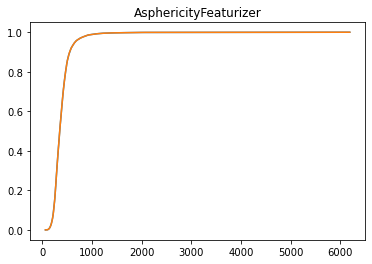

In [7]:
ecdres=1000
necdf_data1=ecdf.ecdf(ecdf_d["data"],res=ecdres)
necdf_data2=ecdf.ecdf(ecdf_d["data"],res=ecdres,smooth=True,unique_only=True)#
necdf1_x=[]
necdf1_y=[]
necdf2_x=[]
necdf2_y=[]
if isinstance(necdf_data1,tuple):
    necdf1_x.append(necdf_data1[0])
    necdf1_y.append(necdf_data1[1])
else:
    for d in necdf_data1:
        necdf1_x.append(d[0])
        necdf1_y.append(d[1])
        
if isinstance(necdf_data2,tuple):
    necdf2_x.append(necdf_data2[0])
    necdf2_y.append(necdf_data2[1])
else:
    for d in necdf_data2:
        necdf2_x.append(d[0])
        necdf2_y.append(d[1])

feat=cdf_h.FixSVFeaturizerList()
feats = feat.describe_features()
for i in range(len(necdf1_x)):

    plt.plot(necdf1_x[i],necdf1_y[i])
    plt.plot(necdf2_x[i],necdf2_y[i])
    plt.title(feats[i])
    plt.show()
    plt.close()

In [ ]:
feat=cdf_h.FixSVFeaturizerList()
feat.describe_features()

In [7]:
import molNet.featurizer.molecule_featurizer as mf
from molNet.featurizer.molecule_featurizer import SingleValueMoleculeFeaturizer

In [8]:
featurizer=[]
for m in dir(mf):
    m = getattr(mf,m)
    if isinstance(m,type(SingleValueMoleculeFeaturizer)):
        if issubclass(m,SingleValueMoleculeFeaturizer):
            featurizer.append(m)

In [9]:
for m  in featurizer:
    print("from",m.__module__,"import",m.__name__)

from molNet.featurizer._autogen_molecule_featurizer_numeric import Asphericity_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BCUT2D_CHGHI_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BCUT2D_CHGLO_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BCUT2D_LOGPHI_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BCUT2D_LOGPLOW_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BCUT2D_MRHI_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BCUT2D_MRLOW_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BCUT2D_MWHI_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BCUT2D_MWLOW_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BalabanJ_Featurizer
from molNet.featurizer._autogen_molecule_featurizer_numeric import BertzCT_Featurizer
from mol

In [10]:
", ".join([m.__name__ for m  in featurizer])

'Asphericity_Featurizer, BCUT2D_CHGHI_Featurizer, BCUT2D_CHGLO_Featurizer, BCUT2D_LOGPHI_Featurizer, BCUT2D_LOGPLOW_Featurizer, BCUT2D_MRHI_Featurizer, BCUT2D_MRLOW_Featurizer, BCUT2D_MWHI_Featurizer, BCUT2D_MWLOW_Featurizer, BalabanJ_Featurizer, BertzCT_Featurizer, Chi0_Featurizer, Chi0n_Featurizer, Chi0v_Featurizer, Chi1_Featurizer, Chi1n_Featurizer, Chi1v_Featurizer, Chi2n_Featurizer, Chi2v_Featurizer, Chi3n_Featurizer, Chi3v_Featurizer, Chi4n_Featurizer, Chi4v_Featurizer, EState_VSA10_Featurizer, EState_VSA11_Featurizer, EState_VSA1_Featurizer, EState_VSA2_Featurizer, EState_VSA3_Featurizer, EState_VSA4_Featurizer, EState_VSA5_Featurizer, EState_VSA6_Featurizer, EState_VSA7_Featurizer, EState_VSA8_Featurizer, EState_VSA9_Featurizer, Eccentricity_Featurizer, ExactMolWt_Featurizer, FpDensityMorgan1_Featurizer, FpDensityMorgan2_Featurizer, FpDensityMorgan3_Featurizer, FractionCSP3_Featurizer, GetFormalCharge_Featurizer, GetSSSR_Featurizer, HallKierAlpha_Featurizer, HeavyAtomCount_Feat

FeatureList(AsphericityFeaturizer,BCUT2D_CHGHIFeaturizer,BCUT2D_CHGLOFeaturizer,BCUT2D_LOGPHIFeaturizer,BCUT2D_LOGPLOWFeaturizer,BCUT2D_MRHIFeaturizer,BCUT2D_MRLOWFeaturizer,BCUT2D_MWHIFeaturizer,BCUT2D_MWLOWFeaturizer,BalabanJFeaturizer,BertzCTFeaturizer,Chi0Featurizer,Chi0nFeaturizer,Chi0vFeaturizer,Chi1Featurizer,Chi1nFeaturizer,Chi1vFeaturizer,Chi2nFeaturizer,Chi2vFeaturizer,Chi3nFeaturizer,Chi3vFeaturizer,Chi4nFeaturizer,Chi4vFeaturizer,EState_VSA10Featurizer,EState_VSA11Featurizer,EState_VSA1Featurizer,EState_VSA2Featurizer,EState_VSA3Featurizer,EState_VSA4Featurizer,EState_VSA5Featurizer,EState_VSA6Featurizer,EState_VSA7Featurizer,EState_VSA8Featurizer,EState_VSA9Featurizer,EccentricityFeaturizer,ExactMolWtFeaturizer,FpDensityMorgan1Featurizer,FpDensityMorgan2Featurizer,FpDensityMorgan3Featurizer,FractionCSP3Featurizer,GetFormalChargeFeaturizer,GetSSSRFeaturizer,HallKierAlphaFeaturizer,HeavyAtomCountFeaturizer,HeavyAtomMolWtFeaturizer,InertialShapeFactorFeaturizer,IpcFeaturizer,

In [2]:
smiles = np.array([k for k in generate_n_random_hetero_carbon_lattice(n=100_000, max_c=10)])

100%|██████████| 100000/100000 [00:25<00:00, 3902.88 mol/s]


In [12]:
max_split=100
progess_bar=True
gen_args=[]
gen_kwargs={}
progress_bar_kwargs={}
featurizer_class=NumAtomsFeaturizer
data=[(s, gen_args, gen_kwargs, featurizer_class) for s in smiles]
from cdf_h import func

In [209]:
data = np.array(data)
cores = solve_cores("all-1")
MOLNET_LOGGER.debug(f"using {cores} cores")
sub_data = np.array_split(data, len(data) / 100)

len(sub_data),cores

(1000, 27)

In [17]:
np.squeeze(np.zeros((1,1,1)))

array(0.)

In [210]:
bins=100
ecdres=200
patience=20
th=1e-4
r = []

In [215]:
def ecdf(data,res=None,smooth=False,unique_only=False):
    x=np.sort(data)
    n=len(data)
    y=np.arange(1,n+1)/n
    if smooth:
        x,uindices = np.unique(x,return_index =True)
        y = np.array([a.mean() for a in np.split(y,uindices[1:])])
        
    if res:
        dp=(np.linspace(0,1,res)*(len(x)-1)).astype(int)
        n=res
        x=x[dp]
        y=y[dp]
    if unique_only:
        x,uindices = np.unique(x,return_index =True)
        y=y[uindices]
    return x,y

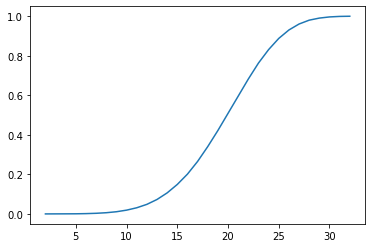

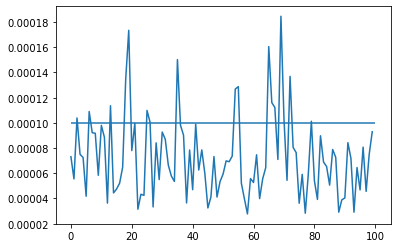

 52%|█████▏    | 52400/100000 [02:41<02:26, 324.76it/s]


In [214]:
r_patience=patience
precfd=np.zeros(ecdres)
error=[]
with Pool(cores) as p:
    if progess_bar:
        with tqdm(total=len(data), **progress_bar_kwargs) as pbar:
            for ri in p.imap(func, sub_data):
                lri=len(ri)
                ri=ri[~np.isnan(ri)]
            
                r.extend(ri)
                
                necdf=ecdf(np.array(r).flatten(),ecdres,smooth=True)
                error.append(
                    np.sqrt(((necdf[1]-precfd)**2).mean())
                )
                
                plt.plot(*necdf)
                clear_output(wait=True)
                plt.show()
                plt.close()
                plt.plot(error[-min(100,len(error)):])
                plt.hlines(th,0,100)
                plt.show()
                plt.close()

                if error[-1]<th:
                    r_patience-=1
                    if r_patience<=0:
                        break
                else:
                    r_patience=patience

                precfd=necdf[1]
                pbar.update(lri)

    else:
        for ri in p.imap(func, sub_data):
            r.extend(ri)

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32.]),
 array([1.92056541e-05, 8.64254437e-05, 2.68879158e-04, 6.52992241e-04,
        1.53645233e-03, 3.14972728e-03, 6.05938388e-03, 1.10720596e-02,
        1.91000230e-02, 3.10939541e-02, 4.83598371e-02, 7.30583084e-02,
        1.06418530e-01, 1.49141507e-01, 2.01284858e-01, 2.65489360e-01,
        3.40477837e-01, 4.21929016e-01, 5.08901821e-01, 5.95989859e-01,
        6.82271261e-01, 7.62983022e-01, 8.31124683e-01, 8.87627718e-01,
        9.30293078e-01, 9.60455558e-01, 9.79939694e-01, 9.90435584e-01,
        9.96264500e-01, 9.98914881e-01, 9.99769532e-01]))

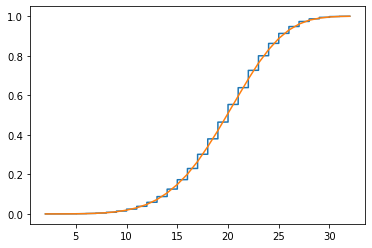

In [218]:

x,y=ecdf(np.array(r).flatten())
plt.plot(x,y)
x,y=ecdf(np.array(r).flatten(),smooth=True,unique_only=True)
plt.plot(x,y)
x,y

/home/julian/anaconda3/envs/graph_chem_unit/lib/python3.8/site-packages/numpy/lib/function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/julian/anaconda3/envs/graph_chem_unit/lib/python3.8/site-packages/numpy/lib/function_base.py:1084: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/julian/anaconda3/envs/graph_chem_unit/lib/python3.8/site-packages/numpy/lib/function_base.py:1085: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/julian/anaconda3/envs/graph_chem_unit/lib/python3.8/site-packages/numpy/lib/function_base.py:1085: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/julian/anaconda3/envs/graph_chem_unit/lib/python3.8/site-packages/numpy/lib/function_base.py:1086: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/julian/anaconda3/en

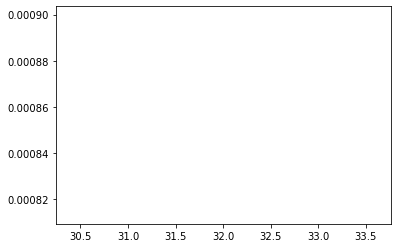

In [202]:
gad=np.gradient(y,x)
plt.plot(x,gad)

<ipython-input-200-f2cdb51f6cee>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + Q * np.exp(-B * (x - M))) ** (1 / v)
<ipython-input-200-f2cdb51f6cee>:17: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + Q * np.exp(-B * (x - M))) ** (1 / v)
<ipython-input-200-f2cdb51f6cee>:17: RuntimeWarning: invalid value encountered in power
  return 1 / (1 + Q * np.exp(-B * (x - M))) ** (1 / v)


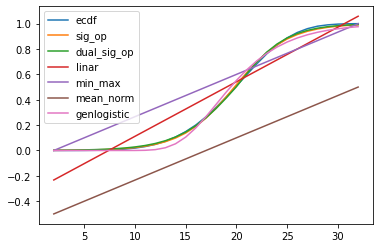

In [200]:
def sig(x,m=0,d=1):
    return 1/(1+np.exp(-d*(x-m)))

def lin(x,m,c):
    return m*x+c

def min_max(x,m,c):
    return np.clip(lin(x,m,c),0,1)

def mean_norm(x):
    return (x-x.mean())/(x.max()-x.min())

def std_norm(x):
    return (x-x.mean())/x.std()

def genlogistic(x, B, M, Q, v):
    return 1 / (1 + Q * np.exp(-B * (x - M))) ** (1 / v)

from scipy.optimize import curve_fit

def dual_sig(x,m,d1,d2):
    mx=np.argmin(np.abs(x-m))
    return np.concatenate((sig(x[:mx],m=m,d=d1),sig(x[mx:],m=m,d=d2)))

def fit_dualsig(x,y):
    popt, pcov = curve_fit(dual_sig, x, y, method='dogbox')
    return popt

def fit_sig(x,y):
    popt, pcov = curve_fit(sig, x, y, method='dogbox')
    return popt

def fit_lin(x,y):
    popt, pcov = curve_fit(lin, x, y, method='dogbox')
    return popt

def fit_genlogistic(x,y):
    popt, pcov = curve_fit(genlogistic, x, y)
    return popt

def fit_min_max(x,y):
    argmin=x.argmin()
    argmax=x.argmax()
    m=(y[argmax]-y[argmin])/(x[argmax]-x[argmin])
    c=y[argmax]-m*x[argmax]
    return m,c

x,y=ecdf(np.array(r).flatten(),smooth=True)
plt.plot(x,y,label="ecdf")

m,d=fit_sig(x,y)
plt.plot(x,sig(x,m=m,d=d),label="sig_op")

m,d1,d2=fit_dualsig(x,y)
plt.plot(x,dual_sig(x,m=m,d1=d1,d2=d2),label="dual_sig_op")

m,c=fit_lin(x,y)
plt.plot(x,lin(x,m,c),label="linar")

m,c=fit_min_max(x,y)
plt.plot(x,min_max(x,m,c),label="min_max")

plt.plot(x,mean_norm(x),label="mean_norm")

B, M, Q, v = fit_genlogistic(x,y)
plt.plot(x,genlogistic(x,B, M, Q, v),label="genlogistic")
#plt.plot(x,std_norm(x),label="std_norm")

plt.legend()
plt.show()
plt.close()


In [165]:
np.log(np.exp(20))

20.0